# DS4400 Course Project

# Beating the book: Machine learning analysis on how to beat the sportsbook

## Vivek Divakarla, Travis Debruyn

## **Data Import/Cleaning**

In [32]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
#Importing data from CSV Files

nflodds2023 = pd.read_csv('nflodds2023 - Sheet1.csv')
offensedefense2023 = pd.read_csv('offdefstats - updated.csv')
nflodds2023['Point Differential'] = nflodds2023['Home Score'] - nflodds2023['Away Score']
nflodds2023['RealTotal'] = nflodds2023['Home Score'] + nflodds2023['Away Score']
nflodds2023['Home Covers Spread'] = nflodds2023['Point Differential'] > nflodds2023['Home Line Close']
nflodds2023['Over Total'] = nflodds2023['RealTotal'] > nflodds2023['Total Score Close']

In [3]:
teamToID = {'Arizona Cardinals':0,'Atlanta Falcons':1,'Baltimore Ravens':2,'Buffalo Bills':3,'Carolina Panthers':4,'Chicago Bears':5,'Cincinnati Bengals':6,'Cleveland Browns':7,'Dallas Cowboys':8,'Denver Broncos':9,'Detroit Lions':10,'Green Bay Packers':11,'Houston Texans':12,'Indianapolis Colts':13,'Jacksonville Jaguars':14,'Kansas City Chiefs':15,'Las Vegas Raiders':16,'Los Angeles Chargers':17,'Los Angeles Rams':18,'Miami Dolphins':19,'Minnesota Vikings':20,'New England Patriots':21,'New Orleans Saints':22,'New York Giants':23,'New York Jets':24,'Philadelphia Eagles':25,'Pittsburgh Steelers':26,'San Francisco 49ers':27,'Seattle Seahawks':28,'Tampa Bay Buccaneers':29,'Tennessee Titans':30,'Washington Commanders':31}
nflodds2023["Home Team"].replace(teamToID, inplace=True)
nflodds2023["Away Team"].replace(teamToID, inplace=True)

In [4]:
def getstat(teamID,col):
    stat = offensedefense2023.loc[teamID,col]
    return stat

In [5]:
columns = ['W%','Points Per Play','Yards Per Play','Passing Yards per Attempt','Rushing Yards Per Attempt','Offensive Score%','Turnover%','Expected Points','Yards per play allowed','Yards per pass attempt allowed','Yards per rush attempt allowed','Def Score%','Def TO%','Def Expected Points']
for column in columns:
    homeStr = 'Home' + column
    awayStr = 'Away' + column
    nflodds2023[homeStr] = nflodds2023['Home Team'].apply(getstat, args=(column,))
    nflodds2023[awayStr] = nflodds2023['Away Team'].apply(getstat, args=(column,))

In [6]:
nflodds2023 = nflodds2023.drop(['Overtime?','Playoff Game?','Neutral Venue?','Home Odds Open','Home Odds Min','Home Odds Max','Away Odds Open','Away Odds Max','Away Odds Min','Home Line Open','Home Line Min','Home Line Max','Away Line Open','Away Line Min','Away Line Max','Home Line Odds Open','Home Line Odds Min','Home Line Odds Max','Away Line Odds Open','Away Line Odds Min','Away Line Odds Max','Total Score Open','Total Score Min','Total Score Max','Total Score Over Open','Total Score Over Min','Total Score Over Max','Total Score Under Open','Total Score Under Min','Total Score Under Max','Notes'],axis=1)

In [7]:
tf_dict = {True: 1, False: 0}
nflodds2023['Home Covers Spread'].replace(tf_dict, inplace = True)
nflodds2023["Over Total"].replace(tf_dict, inplace = True)

In [8]:
nflodds2023.head()

,Date,Home Team,Away Team,Home Score,Away Score,Home Odds Close,Away Odds Close,Home Line Close,Away Line Close,Home Line Odds Close,...,HomeYards per pass attempt allowed,AwayYards per pass attempt allowed,HomeYards per rush attempt allowed,AwayYards per rush attempt allowed,HomeDef Score%,AwayDef Score%,HomeDef TO%,AwayDef TO%,HomeDef Expected Points,AwayDef Expected Points
0,2023-02-12,25,15,35,38,1.83,2.00,-1.0,1.0,1.91,...,4.9,5.6,4.6,4.4,32.4,35.9,15.1,10.3,20.73,-65.59
1,2023-01-29,15,6,23,20,1.77,2.10,-2.0,2.0,1.91,...,5.6,6.2,4.4,4.2,35.9,36.4,10.3,13.1,-65.59,-20.02
2,2023-01-29,25,27,31,7,1.65,2.35,-3.0,3.0,2.00,...,4.9,5.9,4.6,3.4,32.4,25.7,15.1,15.3,20.73,56.26
3,2023-01-22,27,8,19,12,1.50,2.70,-3.5,3.5,1.91,...,5.9,5.7,3.4,4.4,25.7,33.5,15.3,16.2,56.26,31.77
4,2023-01-22,3,6,10,27,1.38,3.15,-6.0,6.0,1.91,...,5.6,6.2,4.3,4.2,31.0,36.4,14.3,13.1,4.46,-20.02


## **Data Exploration**

Text(0.5, 1.0, 'Offense Yards Per Play compared to games won')

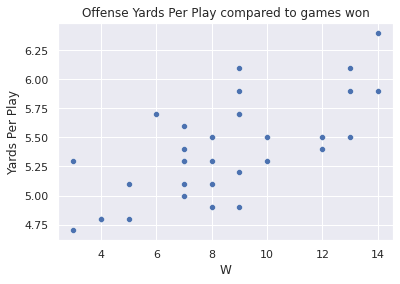

In [9]:
sns.set(style='darkgrid')
sns.scatterplot(x = 'W',y = 'Yards Per Play',data=offensedefense2023).set_title('Offense Yards Per Play compared to games won')

### Graph 1 Explanation

In the exploratory data analysis for this project, we wanted to understand which NFL stats contributed the most to winning, and thus covering more spreads. One stat we thought about was Yards Per Play, as it is a way to understand how efficient offenses are. From this graph, we can see that there certainly is a positive correlation between the stat and winning, as the two 14-win teams are top 5 in the metric, while the worst team in Yards Per Play is also the worst team in the league. There are more stats that have to be understood but this is a good starting point to understanding a team's level

Text(0.5, 1.0, 'Expected Points compared to games won')

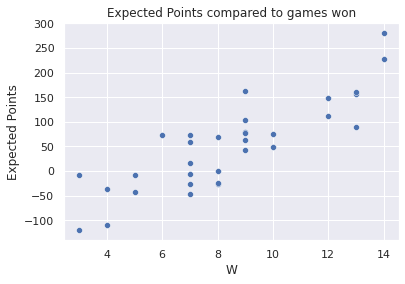

In [10]:
sns.set(style='darkgrid')
sns.scatterplot(x = 'W',y = 'Expected Points',data=offensedefense2023).set_title('Expected Points compared to games won')

Text(0.5, 1.0, 'Point Differential vs Closing Line in relation to Covering the Spread')

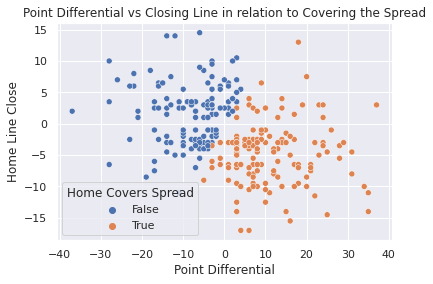

In [40]:
sns.set(style='darkgrid')
sns.scatterplot(x='Point Differential',y='Home Line Close',data=nflodds2023,hue='Home Covers Spread').set_title('Point Differential vs Closing Line in relation to Covering the Spread')

## Model Training and Testing

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [14]:
#Set up features and targets

features = nflodds2023.drop(['Date', 'Home Team', 'Away Team', 'Home Score', 'Away Score','Home Odds Close', 'Away Odds Close', 'Home Line Close',
       'Away Line Close', 'Home Line Odds Close', 'Away Line Odds Close',
       'Total Score Close', 'Total Score Over Close',
       'Total Score Under Close', 'Point Differential', 'RealTotal',
       'Home Covers Spread', 'Over Total'], axis=1)
target = nflodds2023['Home Covers Spread']

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

In [15]:
lr = LogisticRegression(max_iter=10000)
model = lr.fit(X_train, y_train)
test_error = 1 - model.score(X_test, y_test)
test_error

0.2676056338028169

In [16]:
lda = LinearDiscriminantAnalysis()
model_lda = lda.fit(X_train, y_train)
lda_err = 1 - model_lda.score(X_test, y_test)
lda_err

0.2535211267605634

In [34]:
qda = QuadraticDiscriminantAnalysis()
model_qda = qda.fit(X_train, y_train)
qda_err = 1 - model_qda.score(X_test, y_test)
qda_err

0.3380281690140845

In [39]:
for i in range(1,20):
    knn  = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    print(i," Neighbors: ",1-knn.score(X_test,y_test))

1  Neighbors:  0.4225352112676056
2  Neighbors:  0.3943661971830986
3  Neighbors:  0.3802816901408451
4  Neighbors:  0.4084507042253521
5  Neighbors:  0.295774647887324
6  Neighbors:  0.3661971830985915
7  Neighbors:  0.2535211267605634
8  Neighbors:  0.323943661971831
9  Neighbors:  0.295774647887324
10  Neighbors:  0.3661971830985915
11  Neighbors:  0.323943661971831
12  Neighbors:  0.3380281690140845
13  Neighbors:  0.295774647887324
14  Neighbors:  0.3380281690140845
15  Neighbors:  0.352112676056338
16  Neighbors:  0.352112676056338
17  Neighbors:  0.3661971830985915
18  Neighbors:  0.3661971830985915
19  Neighbors:  0.352112676056338


/opt/python/envs/default/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

<BarContainer object of 28 artists>

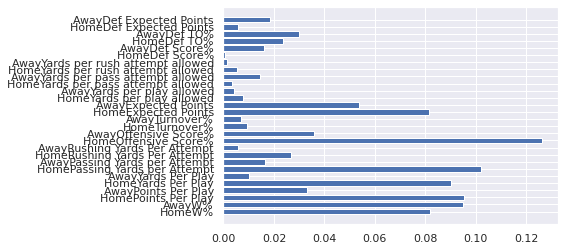

In [33]:
#Feature Importance 
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
plt.barh(features.columns, clf.feature_importances_)